In [1]:
# import
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.transforms as mtrans
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
from matplotlib import cm
from matplotlib.patches import Patch
# for using Times New Roman
import matplotlib.font_manager
import os as os
import subprocess
import sys as sys
import re
import threading
import logging
import time
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Using seaborn's style
plt.style.use(['ggplot', 'seaborn-whitegrid'])
WIDTH = 345

def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

config = {
    "figure.figsize": set_size(WIDTH),
    "grid.linestyle": '--',
    "hatch.color": '#eeeeee',
    "hatch.linewidth": 0.618,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "Times New Roman",
    "text.latex.unicode": True,
    "axes.unicode_minus": True,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 12,
    # Make the label fonts a little smaller
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.handletextpad": 0.5,
    "legend.columnspacing": 1,
    "legend.numpoints": 3,
}

mpl.rcParams.update(config)

In [4]:
sf32sf10c2=[204.143,77.9247,69.6977,60.2877,50.3924,44.1215,40.1627,35.8974,34.8597,30.9433,27.7942]
sf32sf10c4=[207.766,91.9002,76.8554,68.885,56.6062,52.017,45.7467,40.8248,34.9599,34.2628,34.7104]
sf32sf10c8=[190.509,87.4085,76.3617,66.6104,60.5211,51.7545,46.9294,41.9987,38.3131,34.0578,29.6921]
sf32sf10c16=[159.092,71.8765,68.5235,59.1902,52.2359,49.9488,45.4973,38.8205,32.7656,29.2971,26.4608]
sf64sf10c2=[186.383,62.0611,55.4004,46.467,39.5068,35.4211,33.3658,31.1589,26.3708,25.9383,24.2228]
sf64sf10c4=[210.106,69.6984,56.2855,49.2465,43.1322,37.7588,33.898,31.8843,28.4902,25.4205,26.0486]
sf64sf10c8=[203.901,66.1579,55.4316,49.2446,43.4839,39.4896,33.6397,31.3638,27.4266,26.8922,26.488]
sf64sf10c16=[186.807,69.6662,55.3838,49.518,41.3374,38.2437,31.8717,29.5898,28.8914,28.216,24.1624]
sf32sf1c4=[120.222,66.6394,56.1459,46.8674,43.5049,36.8234,32.949,29.0619,27.3983,25.0143,23.3056]
sf64sf1c4=[102.965,56.7701,49.189,44.7372,38.3179,33.9261,31.2752,27.046,24.6916,24.1507,22.0564]
sf128sf1c4=[41.2692,19.9475,17.2869,15.4025,15.1597,13.6818,15.15,12.8955,13.7883,13.3329,13.7356]
index = ["0","10","20","30","40","50","60","70","80","90","100"]

In [5]:
def plot_lines(data, ylabel, xlabel, index, column, colors, hatches, axe):

    length = len(data)
    for i in range(length):
        axe.plot(index,data[i],color=colors[i],marker=hatches[i],linestyle='--', label=column[i])
    
    axe.set_xticklabels(index, rotation = 0)
    axe.set_ylabel(ylabel)
    axe.set_xlabel(xlabel)

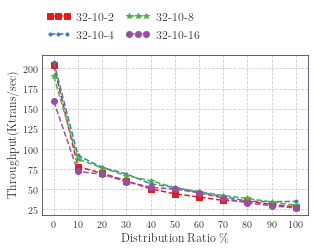

In [35]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
    
dim = set_size(WIDTH)
width_ratio = 1.0
fig, axe = plt.subplots(1, 1, figsize=(dim[0] * width_ratio, dim[1]))
colmap = cm.get_cmap("Set1")
hatches = ['s', '.', '*', 'o']
column=["32-10-2","32-10-4","32-10-8","32-10-16"]
plot_lines([sf32sf10c2,sf32sf10c4,sf32sf10c8,sf32sf10c16], "Throughput(Ktrans/sec)",
           "Distribution Ratio \%", index, column, colors=[colmap.colors[i] for i in range(4)], hatches=hatches, axe=axe)
axe.legend(loc='upper left',bbox_to_anchor=(0., 1.2, 0, .102), ncol=2,borderaxespad=0.)

plt.savefig("/Users/huiyujie/Desktop/gam-sf32sf10.pdf", format='pdf', bbox_inches='tight')

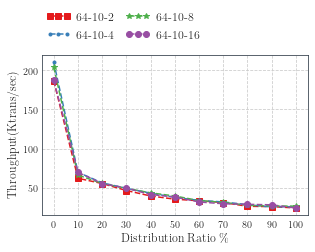

In [36]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
    
dim = set_size(WIDTH)
width_ratio = 1.0
fig, axe = plt.subplots(1, 1, figsize=(dim[0] * width_ratio, dim[1]))
colmap = cm.get_cmap("Set1")
hatches = ['s', '.', '*', 'o']
column=["64-10-2","64-10-4","64-10-8","64-10-16"]
plot_lines([sf64sf10c2,sf64sf10c4,sf64sf10c8,sf64sf10c16], "Throughput(Ktrans/sec)",
           "Distribution Ratio \%", index, column, colors=[colmap.colors[i] for i in range(4)], hatches=hatches, axe=axe)
axe.legend(loc='upper left',bbox_to_anchor=(0., 1.2, 0, .102), ncol=2,borderaxespad=0.)

plt.savefig("/Users/huiyujie/Desktop/gam-sf64sf10.pdf", format='pdf', bbox_inches='tight')

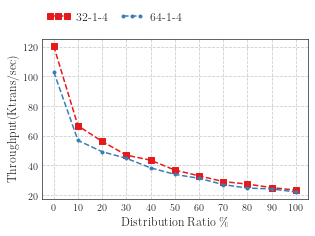

In [38]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
    
dim = set_size(WIDTH)
width_ratio = 1.0
fig, axe = plt.subplots(1, 1, figsize=(dim[0] * width_ratio, dim[1]))
colmap = cm.get_cmap("Set1")
hatches = ['s', '.', '*', 'o']
column=["32-1-4","64-1-4"]
plot_lines([sf32sf1c4,sf64sf1c4], "Throughput(Ktrans/sec)",
           "Distribution Ratio \%", index, column, colors=[colmap.colors[i] for i in range(4)], hatches=hatches, axe=axe)
axe.legend(loc='upper left',bbox_to_anchor=(0., 1.1, 0, .102), ncol=2,borderaxespad=0.)

plt.savefig("/Users/huiyujie/Desktop/gam-sf1.pdf", format='pdf', bbox_inches='tight')

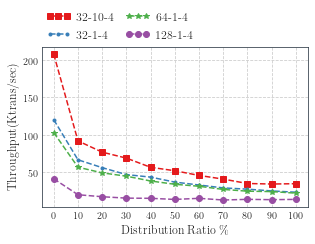

In [9]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
    
dim = set_size(WIDTH)
width_ratio = 1.0
fig, axe = plt.subplots(1, 1, figsize=(dim[0] * width_ratio, dim[1]))
colmap = cm.get_cmap("Set1")
hatches = ['s', '.', '*', 'o']
column=["32-10-4","32-1-4","64-1-4","128-1-4"]
plot_lines([sf32sf10c4, sf32sf1c4,sf64sf1c4,sf128sf1c4], "Throughput(Ktrans/sec)",
           "Distribution Ratio \%", index, column, colors=[colmap.colors[i] for i in range(4)], hatches=hatches, axe=axe)
axe.legend(loc='upper left',bbox_to_anchor=(0., 1.15, 0, .102), ncol=2,borderaxespad=0.)

plt.savefig("/Users/huiyujie/Desktop/gam-c4.pdf", format='pdf', bbox_inches='tight')